# Capstone Project The Battle of the neighborhoods (Week 2)

## Opening a restaurant in El Paso Texas Area, Zipcode or Neighborhood Recommendation Analysis

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction (Business Problem) <a name="introduction"></a>

1.1 Description of the problem and discussion of the background

El paso Texas is a multi diverse cultural city bordering with Mexico. It is one of the most
safest cities in the United States and the cost of living is very affordable. The problem
is that we need to find out what area, zipcode or neighborhood is recommended to open a restaurant.

We need to find the areas with highest density of restaurants since people
will go to these areas to socialize and or eat.

1.1.1 Interest

Investors, retired people and anyone willing to invest in opening a restaurant would be 
interested in the findings. Also customers and Pasoans would be interested in knowing where a 
restaurant is recommended to be open.

## 2. Data <a name="data"></a>

2.1 Description of the Data and how it will be used to solve the problem

The data contains the zipcodes, the latitude, longitude, population and density.

The data source can be found in Simple Maps, US Zip Codes Database website <a>https://simplemaps.com/data/us-zips</a>

We are going to find the venues with the most density areas because we are going to use the hypothesis that
people will go to the most dense areas instead of the lonely areas to socialize or to eat.

For example, features that can be extracted from the data can be population, zipcode area, latitude and longitude, most common venues and the Foursquare data set. 

2.1.2 Data preparation

We need to filter the zipcodes that correspond to the city of El Paso Texas.

2.1.3 Features

These are the factors that will make us make a recommendation:
* density of areas or zipcodes where restaurants are located
* number of population in those areas
* number of restaurants in those areas
* the most common types of venues

We will use the latitude and longitude of every zipcode to define our areas or neighborhoods.

Data source will be extracted and used:
* density of restaurants and their most common venues and features in every zipcode or area using Foursquare API
* number of restaurants and their most common venues in every areas using Foursquare API
* zip codes will be extracted using a csv file from maps website
* most common venues need to be analized in order to make a recommendation

### Import libraries and dependencies

In [61]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


### Now let's read our file

In [62]:
!wget -O elpasozips.csv https://simplemaps.com/data/us-zips


df = pd.read_csv("elpasozips.csv")


In [63]:
df.head() #let's the the head

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,79821,31.97693,-106.59781,Anthony,TX,Texas,True,NaN,7482,241.9,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Denver
1,79835,31.93522,-106.58693,Canutillo,TX,Texas,True,NaN,10810,414.2,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Denver
2,79836,31.57128,-106.20190,Clint,TX,Texas,True,NaN,5796,116.2,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Denver
3,79838,31.49183,-106.17359,Fabens,TX,Texas,True,NaN,6376,114.2,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Ojinaga
4,79849,31.56127,-106.25047,San Elizario,TX,Texas,True,NaN,12780,363.9,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Denver


### Let's rename the column names

In [65]:
zipcodes = df[['zip','lat','lng','city','state_id','state_name','population','density','county_name']] #get this columns into zipcodes data frame

zipcodes.rename(columns={'zip':'zipcode','lat':'Latitude','lng':'Longitude'}, inplace=True)

In [66]:
zipcodes.head()

,zipcode,Latitude,Longitude,city,state_id,state_name,population,density,county_name
0,79821,31.97693,-106.59781,Anthony,TX,Texas,7482,241.9,El Paso
1,79835,31.93522,-106.58693,Canutillo,TX,Texas,10810,414.2,El Paso
2,79836,31.57128,-106.20190,Clint,TX,Texas,5796,116.2,El Paso
3,79838,31.49183,-106.17359,Fabens,TX,Texas,6376,114.2,El Paso
4,79849,31.56127,-106.25047,San Elizario,TX,Texas,12780,363.9,El Paso


### Let's get the latitude and longitude of the city an plot a map to see how it looks like

In [67]:
address = 'El Paso, TX'

geolocator = Nominatim(user_agent="ep_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of El Paso City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of El Paso City are 31.7754152, -106.4646348.


In [68]:
# create map of El Paso using latitude and longitude values
map_elpaso = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, zipcode in zip(zipcodes['Latitude'], zipcodes['Longitude'], zipcodes['city'], zipcodes['zipcode']):
    label = '{}, {}'.format(city, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_elpaso)  
    
map_elpaso

## 3. Methodology

In this project we will try to find the areas with more density of restaurants so that we can recommend where people go to eat, we will limit to 800 meters around the city.

We already have the data in our first step, we cleaned it and we did initial visualization and we identified venues using Foursquare API.

Now in the second step we are going to explore the density of restaurants within 800 meters from El Paso Texas. We will print a map to see how the location data looks like.

Lastly we are going to cluster the areas to see where in the El Paso city there is more density of restaurants and people that go to eat. We will use **k-means** clustering algorithm to find out the areas in radious of 500 meters. We will also generate a map using folio to identify and make a recommendation of dense areas.


### Let's set up our Foursquare API with credentials

In [69]:
CLIENT_ID = 'KBFZMWVX05RF4N3LHRAA45VA1GYWHT1HFF11YTJJM0HWR1E1' # your Foursquare ID
CLIENT_SECRET = 'DIHLOZNB1IGOWZVNAQSHHRUYGAJRSIDVJZAWKILYSCM0JLML' # your Foursquare Secret
VERSION = '20200720' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KBFZMWVX05RF4N3LHRAA45VA1GYWHT1HFF11YTJJM0HWR1E1
CLIENT_SECRET:DIHLOZNB1IGOWZVNAQSHHRUYGAJRSIDVJZAWKILYSCM0JLML


### Let's analize the first zipcode

In [70]:
zipcodes.loc[0, 'zipcode']

79821

In [71]:
zipcode_latitude = zipcodes.loc[0, 'Latitude'] # neighborhood latitude value
zipcode_longitude = zipcodes.loc[0, 'Longitude'] # neighborhood longitude value

zipcode_name = zipcodes.loc[0, 'zipcode'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(zipcode_name, 
                                                               zipcode_latitude, 
                                                               zipcode_longitude))

Latitude and longitude values of 79821 are 31.97693, -106.59781000000001.


In [165]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 800 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    zipcode_latitude, 
    zipcode_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=KBFZMWVX05RF4N3LHRAA45VA1GYWHT1HFF11YTJJM0HWR1E1&client_secret=DIHLOZNB1IGOWZVNAQSHHRUYGAJRSIDVJZAWKILYSCM0JLML&v=20200720&ll=31.97693,-106.59781000000001&radius=800&limit=100'

In [166]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f15d72ba536c57dc6f9b26c'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Anthony',
  'headerFullLocation': 'Anthony',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 31.984130007200008,
    'lng': -106.58933788989431},
   'sw': {'lat': 31.96972999279999, 'lng': -106.60628211010571}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '58e3edd4ef4694459e5ff7b2',
       'name': "Aaron's",
       'location': {'address': '705 MAIN ST',
        'lat': 31.973994,
        'lng': -106.599315,
        'labeledLatLngs': [{'label': 'display',
          'lat': 31.973994,
     

### Let's create a function to get the category type

In [167]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Let's normalize json file and put it in a pandas dataframe

In [168]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Aaron's,Furniture / Home Store,31.973994,-106.599315
1,Rodriguez Plastics,Furniture / Home Store,31.973258,-106.598127


In [169]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


### Let's create a function that gets the venues that are nearby

In [170]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['zipcode', 
                  'zipcode Latitude', 
                  'zipcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Let's call the function to get the near by venues in el Paso

In [171]:
elpaso_venues = getNearbyVenues(names=zipcodes['zipcode'],
                                   latitudes=zipcodes['Latitude'],
                                   longitudes=zipcodes['Longitude']
                                  )

79821
79835
79836
79838
79849
79853
79901
79902
79903
79904
79905
79906
79907
79908
79911
79912
79915
79916
79920
79922
79924
79925
79927
79928
79930
79932
79934
79935
79936
79938


In [172]:
print(elpaso_venues.shape)
elpaso_venues.head()

(242, 7)


,zipcode,zipcode Latitude,zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,79821,31.97693,-106.59781,Aaron's,31.973994,-106.599315,Furniture / Home Store
1,79821,31.97693,-106.59781,Rodriguez Plastics,31.973258,-106.598127,Furniture / Home Store
2,79835,31.93522,-106.58693,lienzo Charro Castro,31.936810,-106.590302,Stables
3,79849,31.56127,-106.25047,San Eli Supermercado,31.564419,-106.245333,Supermarket
4,79853,31.42987,-106.06371,Sonic Ranch - Neve Room,31.424557,-106.063278,Concert Hall


### Let's see how many venues are by zipcode

In [173]:
elpaso_venues.groupby('zipcode').count()

,zipcode Latitude,zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
zipcode,,,,,,
79821,2,2,2,2,2,2
79835,1,1,1,1,1,1
79849,1,1,1,1,1,1
79853,1,1,1,1,1,1
79901,36,36,36,36,36,36
79902,8,8,8,8,8,8
79903,10,10,10,10,10,10
79904,7,7,7,7,7,7
79905,19,19,19,19,19,19


Let's examine zipcode 79936 and check venues

In [174]:
elpaso_venues[elpaso_venues.zipcode ==79936]

,zipcode,zipcode Latitude,zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
228,79936,31.77618,-106.29785,Applebee's Grill + Bar,31.771403,-106.304007,American Restaurant
229,79936,31.77618,-106.29785,Family Dollar,31.776763,-106.294192,Discount Store
230,79936,31.77618,-106.29785,Walgreens,31.781502,-106.301881,Pharmacy
231,79936,31.77618,-106.29785,SUBWAY,31.769920,-106.300909,Sandwich Place
232,79936,31.77618,-106.29785,Redbox,31.781798,-106.302176,Video Store
233,79936,31.77618,-106.29785,7-Eleven,31.782017,-106.302722,Convenience Store
234,79936,31.77618,-106.29785,Bourbon & Brews Bar & Grille,31.781753,-106.302513,Bar
235,79936,31.77618,-106.29785,Barfly,31.769892,-106.300274,Bar
236,79936,31.77618,-106.29785,Burridough,31.781221,-106.302817,Bakery
237,79936,31.77618,-106.29785,Tropical Snow Hawaiian Shaved Ice,31.781235,-106.302941,Food Truck


In [175]:

print('There are {} uniques categories.'.format(len(elpaso_venues['Venue Category'].unique())))

There are 88 uniques categories.


### Let's create a data frame wih one hot encoding to analyze every zipcode and see every venue category

In [176]:
# one hot encoding
elpaso_onehot = pd.get_dummies(elpaso_venues[['Venue Category']], prefix="", prefix_sep="")

# add zipcode column back to dataframe
elpaso_onehot['zipcode'] = elpaso_venues['zipcode'] 

# move zipcode column to the first column
fixed_columns = [elpaso_onehot.columns[-1]] + list(elpaso_onehot.columns[:-1])
elpaso_onehot = elpaso_onehot[fixed_columns]

elpaso_onehot.head()

,zipcode,American Restaurant,Arcade,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Cemetery,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Discount Store,Dive Bar,Farm,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gay Bar,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hotel,Ice Cream Shop,Intersection,Italian Restaurant,Juice Bar,Karaoke Bar,Liquor Store,Lounge,Market,Martial Arts Dojo,Mexican Restaurant,Mobile Phone Shop,Nightclub,Optical Shop,Outlet Store,Park,Pawn Shop,Pet Store,Pharmacy,Pizza Place,Pool,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Smoke Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stables,Supermarket,Tennis Stadium,Theater,Thrift / Vintage Store,Trail,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center
0,79821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,79821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,79835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,79849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,79853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [177]:
elpaso_onehot.shape

(242, 89)

We group by zipcode and take the average or mean

In [178]:
elpaso_grouped = elpaso_onehot.groupby('zipcode').mean().reset_index()
elpaso_grouped

,zipcode,American Restaurant,Arcade,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Cemetery,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Discount Store,Dive Bar,Farm,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gay Bar,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hotel,Ice Cream Shop,Intersection,Italian Restaurant,Juice Bar,Karaoke Bar,Liquor Store,Lounge,Market,Martial Arts Dojo,Mexican Restaurant,Mobile Phone Shop,Nightclub,Optical Shop,Outlet Store,Park,Pawn Shop,Pet Store,Pharmacy,Pizza Place,Pool,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Smoke Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stables,Supermarket,Tennis Stadium,Theater,Thrift / Vintage Store,Trail,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center
0,79821,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0
1,79835,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0
2,79849,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0
3,79853,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0
4,79901,0.027778,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.027778,0.0,

### Let's see the correlation of population and density by visualization

In [ ]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

In [206]:
df_elpaso= df

df_elpaso.sort_values(['population'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_elpaso.head()

df_top5.set_index('zip', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_top5.head()




,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
zip,,,,,,,,,,,,,,,,,
79936,31.77618,-106.29785,El Paso,TX,Texas,True,NaN,112355,1610.6,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Denver
79912,31.84821,-106.53264,El Paso,TX,Texas,True,NaN,80264,1257.8,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Denver
79938,31.83091,-105.97012,El Paso,TX,Texas,True,NaN,80143,56.7,48141,El Paso,"{'48141':99.51,'48229':0.49}",El Paso|Hudspeth,48141|48229,False,False,America/Denver
79924,31.90245,-106.41325,El Paso,TX,Texas,True,NaN,59729,1862.7,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Denver
79928,31.62865,-106.15597,El Paso,TX,Texas,True,NaN,57324,183.8,48141,El Paso,{'48141':100},El Paso,48141,False,False,America/Denver


In [207]:
# transpose the dataframe
df_top5 = pd.DataFrame(df_top5['population'].transpose() )

df_top5.head()



,population
zip,
79936,112355
79912,80264
79938,80143
79924,59729
79928,57324


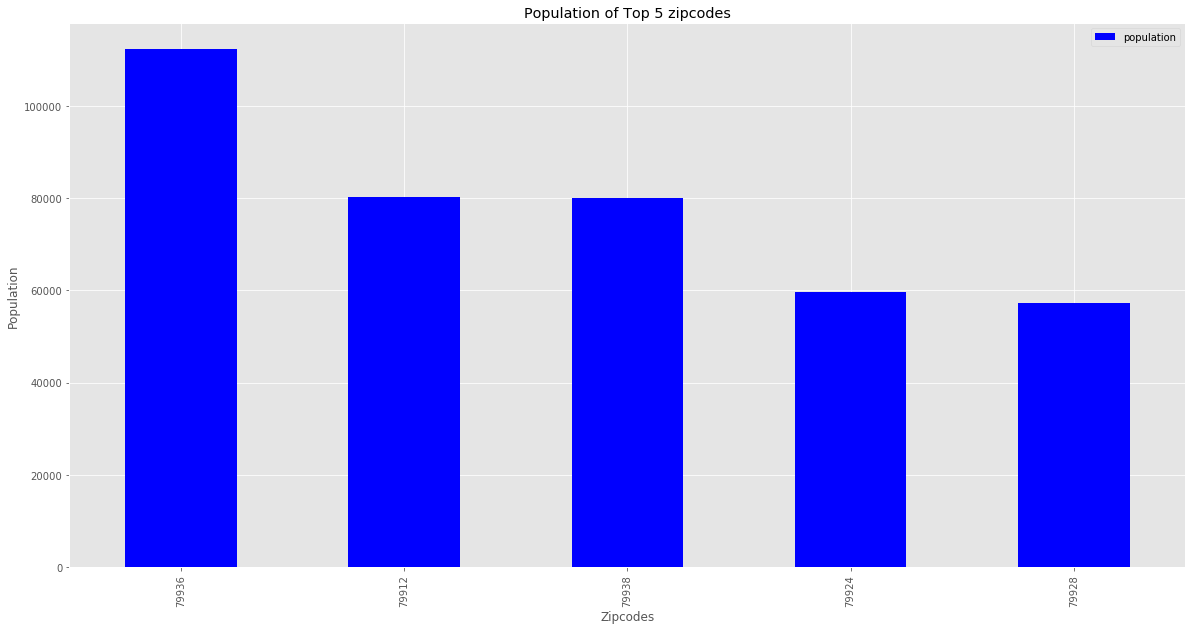

In [208]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             color='b'
             )

plt.title('Population of Top 5 zipcodes')
plt.ylabel('Population')
plt.xlabel('Zipcodes')

plt.show()

### Now, let's do the same thing for the density feature

In [210]:
df_elpaso.sort_values(['density'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_elpaso.head()

df_top5.set_index('zip', inplace=True)


df_top5 = pd.DataFrame(df_top5['density'].transpose() )

# let's view the first five elements and see how the dataframe was changed
df_top5.head()

,density
zip,
79920,11985.9
79903,2335.0
79901,1988.7
79935,1987.1
79924,1862.7


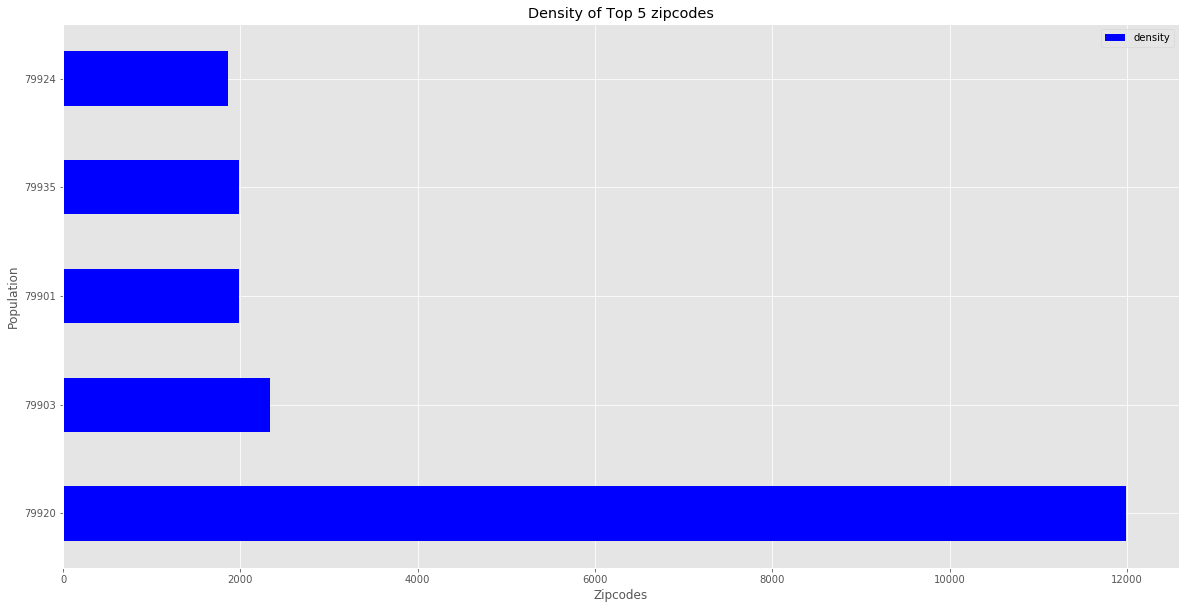

In [211]:


df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='barh', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             color='b'
             )

plt.title('Density of Top 5 zipcodes')
plt.ylabel('Population')
plt.xlabel('Zipcodes')

plt.show()

In [179]:
elpaso_grouped.shape

(24, 89)

### Let's print the top 5 most common venues in every zipcode area

In [180]:
num_top_venues = 5

for hood in elpaso_grouped['zipcode']:
    print("----"+str(hood)+"----")
    temp = elpaso_grouped[elpaso_grouped['zipcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----79821----
                    venue  freq
0  Furniture / Home Store   1.0
1     American Restaurant   0.0
2      Mexican Restaurant   0.0
3                Pharmacy   0.0
4               Pet Store   0.0


----79835----
                 venue  freq
0              Stables   1.0
1  American Restaurant   0.0
2    Martial Arts Dojo   0.0
3            Pet Store   0.0
4            Pawn Shop   0.0


----79849----
                 venue  freq
0          Supermarket   1.0
1  American Restaurant   0.0
2    Martial Arts Dojo   0.0
3            Pet Store   0.0
4            Pawn Shop   0.0


----79853----
                 venue  freq
0         Concert Hall   1.0
1  American Restaurant   0.0
2         Home Service   0.0
3             Pharmacy   0.0
4            Pet Store   0.0


----79901----
                venue  freq
0  Mexican Restaurant  0.14
1          Restaurant  0.06
2         Pizza Place  0.06
3      Discount Store  0.06
4             Gay Bar  0.06


----79902----
                  venue 

### Let's write a function that sorts venues in descending order

In [181]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### let's put in a pandas dataframe the 10 top most common venues

In [242]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zipcodes_venues_sorted = pd.DataFrame(columns=columns)
zipcodes_venues_sorted['zipcode'] = elpaso_grouped['zipcode']

for ind in np.arange(elpaso_grouped.shape[0]):
    zipcodes_venues_sorted.iloc[ind, 1:] = return_most_common_venues(elpaso_grouped.iloc[ind, :], num_top_venues)

zipcodes_venues_sorted.head()

,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,79821,Furniture / Home Store,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store
1,79835,Stables,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store
2,79849,Supermarket,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store
3,79853,Concert Hall,Weight Loss Center,Warehouse Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Discount Store
4,79901,Mexican Restaurant,Bistro,Gay Bar,Pizza Place,Discount Store,Restaurant,Lounge,Pub,Pharmacy,Optical Shop


### Let's run the k-means algorithm to cluster the zipcodes into 5 clusters

In [243]:
# set number of clusters
kclusters = 5

elpaso_grouped_clustering = elpaso_grouped.drop('zipcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(elpaso_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 4, 3, 1, 1, 1, 1, 1, 1], dtype=int32)

### Let's merge a new dataframe that includes the cluster and the top 10 venues for each zipcode

In [244]:
# add clustering labels
zipcodes_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

elpaso_merged = zipcodes

# merge elpaso_grouped with zipcodes to add latitude/longitude for each neighborhood
elpaso_merged = elpaso_merged.join(zipcodes_venues_sorted.set_index('zipcode'), on='zipcode')

elpaso_merged.head() # check the last columns!

,zipcode,Latitude,Longitude,city,state_id,state_name,population,density,county_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,79821,31.97693,-106.59781,Anthony,TX,Texas,7482,241.9,El Paso,0.0,Furniture / Home Store,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store
1,79835,31.93522,-106.58693,Canutillo,TX,Texas,10810,414.2,El Paso,2.0,Stables,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store
2,79836,31.57128,-106.20190,Clint,TX,Texas,5796,116.2,El Paso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79838,31.49183,-106.17359,Fabens,TX,Texas,6376,114.2,El Paso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79849,31.56127,-106.25047,San Elizario,TX,Texas,12780,363.9,El Paso,4.0,Supermarket,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store


### Let's create a map to visualize the clusters!

In [254]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(elpaso_merged['Latitude'], elpaso_merged['Longitude'], elpaso_merged['zipcode'], elpaso_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[int(np.nan_to_num(cluster))-1],
        fill=True,
        fill_color=rainbow[int(np.nan_to_num(cluster))-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let's examine the clusters

In [248]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 0, elpaso_merged.columns[[0,1] + list(range(5, elpaso_merged.shape[1]))]]

,zipcode,Latitude,state_name,population,density,county_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,79821,31.97693,Texas,7482,241.9,El Paso,0.0,Furniture / Home Store,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store


In [249]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 1, elpaso_merged.columns[[0,1] + list(range(5, elpaso_merged.shape[1]))]]

,zipcode,Latitude,state_name,population,density,county_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,79901,31.76003,Texas,10138,1988.7,El Paso,1.0,Mexican Restaurant,Bistro,Gay Bar,Pizza Place,Discount Store,Restaurant,Lounge,Pub,Pharmacy,Optical Shop
7,79902,31.78412,Texas,20543,1250.4,El Paso,1.0,Park,Grocery Store,Trail,Pool,Tennis Stadium,Ice Cream Shop,Fast Food Restaurant,Discount Store,Dance Studio,Clothing Store
8,79903,31.78615,Texas,16399,2335.0,El Paso,1.0,Pawn Shop,Convenience Store,Cemetery,Video Store,Pizza Place,Clothing Store,Ice Cream Shop,Restaurant,Mexican Restaurant,Park
9,79904,31.85286,Texas,34461,1544.4,El Paso,1.0,Grocery Store,Discount Store,Convenience Store,Burger Joint,Mexican Restaurant,Martial Arts Dojo,Pawn Shop,Fried Chicken Joint,Food Truck,Fast Food Restaurant
10,79905,31.76655,Texas,22447,1550.9,El Paso,1.0,Mexican Restaurant,Fast Food Restaurant,Convenience Store,Discount Store,Pharmacy,Pizza Place,Market,Department Store,Coffee Shop,Ice Cream Shop
11,79906,31.80924,Texas,5139,406.8,El Paso,1.0,Gym,Pizza Place,Karaoke Bar,Trail,Gas Station,Convenience Store,Baseball Field,Bowling Alley,Dive Bar,Concert Hall
12,79907,31.70750,Texas,53277,1563.4,El Paso,1.0,Pizza Place,Fast Food Restaurant,Grocery Store,Fried Chicken Joint,Park,Outlet Store,Breakfast Spot,Discount Store,Food Truck,Furniture / Home Store
14,79911,31.89246,Texas,5732,96.9,El Paso,1.0,Business Service,Weight Loss Center,Clothing Store,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Discount Store
15,79912,31.84821,Texas,80264,1257.8,El Paso,1.0,Weight Loss Center,Pool,Home Service,Sandwich Place,Convenience Store,Discount Store,Coffee Shop,Concert Hall,Construction & Landscaping,Cupcake Shop
16,79915,31.74585,Texas,35445,1734.6,El Paso,1.0,Sandwich Place,Fast Food Restaurant,Gift Shop,Burrito Place,Convenience Store,Bookstore,Weight Loss Center,Department Store,Concert Hall,Construction & Landscaping


In [251]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 2, elpaso_merged.columns[[0,1] + list(range(5, elpaso_merged.shape[1]))]]

,zipcode,Latitude,state_name,population,density,county_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,79835,31.93522,Texas,10810,414.2,El Paso,2.0,Stables,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store


In [252]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 3, elpaso_merged.columns[[0,1] + list(range(5, elpaso_merged.shape[1]))]]

,zipcode,Latitude,state_name,population,density,county_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,79853,31.42987,Texas,2624,46.2,El Paso,3.0,Concert Hall,Weight Loss Center,Warehouse Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Discount Store


In [253]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 4, elpaso_merged.columns[[0,1] + list(range(5, elpaso_merged.shape[1]))]]

,zipcode,Latitude,state_name,population,density,county_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,79849,31.56127,Texas,12780,363.9,El Paso,4.0,Supermarket,Weight Loss Center,Dive Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Department Store


In [212]:
elpaso_venues.head()

,zipcode,zipcode Latitude,zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,79821,31.97693,-106.59781,Aaron's,31.973994,-106.599315,Furniture / Home Store
1,79821,31.97693,-106.59781,Rodriguez Plastics,31.973258,-106.598127,Furniture / Home Store
2,79835,31.93522,-106.58693,lienzo Charro Castro,31.936810,-106.590302,Stables
3,79849,31.56127,-106.25047,San Eli Supermercado,31.564419,-106.245333,Supermarket
4,79853,31.42987,-106.06371,Sonic Ranch - Neve Room,31.424557,-106.063278,Concert Hall


In [213]:
X = elpaso_venues[['zipcode']] .values  #.astype(float)
X[0:5]




array([[79821],
       [79821],
       [79835],
       [79849],
       [79853]])

In [214]:
type(X)

numpy.ndarray

In [215]:
y = elpaso_venues['Venue Category'].values
y[0:5]

array(['Furniture / Home Store', 'Furniture / Home Store', 'Stables',
       'Supermarket', 'Concert Hall'], dtype=object)

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (193, 1) (193,)
Test set: (49, 1) (49,)


In [219]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc



array([0.04081633, 0.04081633, 0.06122449, 0.02040816, 0.        ,
       0.        , 0.        , 0.02040816, 0.        ])

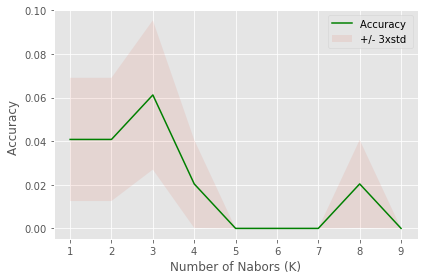

In [220]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [221]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.061224489795918366 with k= 3


In [255]:
elpaso_venues.head()

,zipcode,zipcode Latitude,zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,79821,31.97693,-106.59781,Aaron's,31.973994,-106.599315,Furniture / Home Store
1,79821,31.97693,-106.59781,Rodriguez Plastics,31.973258,-106.598127,Furniture / Home Store
2,79835,31.93522,-106.58693,lienzo Charro Castro,31.936810,-106.590302,Stables
3,79849,31.56127,-106.25047,San Eli Supermercado,31.564419,-106.245333,Supermarket
4,79853,31.42987,-106.06371,Sonic Ranch - Neve Room,31.424557,-106.063278,Concert Hall


## Results and discussions. <a name="results"></a>

We can see that el Paso Texas even though is a small city, it is diversified in all areas. However, the top 9 zipcodes that the number "1st most common venue" are:

79901
79905
79907
79915
79916
79920
79922
79925
79932






The top 5 zipcodes with more population are:

79936
79912
79938
79924
79928

And the top 5 zipcodes with more denisty are:

79920
79903
79901
79935
79924

## Conclusion <a name="conclusion"></a>

We can conclude that we can recommend to start a new restaurant in the east side area of el Paso since the data shows that there the most common venues are of type of restaurants.  And those areas are the areas with most density and population.


However, it is a business decision to decide if they want to open a restaurant in an area where there is a lot o restaurants and people go a lot or if they want to be pioneers and open a restaurant in areas where there is no restaurants.

